<a href="https://colab.research.google.com/github/rutripathi96/Market-Basket-Analysis/blob/main/Market%20Basket%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

## Market Basket Analysis for Retail Strategy Optimization

### Overview
This project aims to uncover insights into consumer purchasing patterns through Market Basket Analysis, a key data mining technique used to enhance decision-making in the retail sector. By analyzing transactional data, this study seeks to identify which products are frequently bought together, providing a foundation for strategic retail decisions such as product placement, promotional bundles, and inventory management.

### Objectives
- **Identify Strong Associations:** Utilize the Apriori algorithm to discover frequent item sets and strong rules in the transaction data.
- **Visualize Relationships:** Create heatmaps and network graphs to visualize the strength and complexity of product associations.
- **Develop Strategic Recommendations:** Based on the analysis, recommend actionable strategies for marketing, store layout, and inventory management.

### Methodology
- **Data Preprocessing:** Clean and prepare transactional data for analysis, transforming it into a format suitable for the Apriori algorithm.
- **Analysis Execution:** Apply the Apriori algorithm to extract frequent item sets and generate association rules with metrics like support, confidence, and lift.
- **Visualization:** Employ tools such as heatmaps and network diagrams to illustrate the relationships between items and the strength of their associations.

### Expected Outcomes
By the end of this project, we expect to provide:
- **Detailed Insights:** A list of item combinations with the highest lift values, suggesting strong co-purchase trends.
- **Actionable Business Strategies:** Recommendations on product placements that could potentially increase sales through cross-selling and upselling.
- **Enhanced Customer Understanding:** Improved insights into customer buying behavior, facilitating more targeted marketing efforts and personalized shopping experiences.

### Significance
The results of this analysis will enable retail managers and marketers to make informed decisions that could lead to improved revenue, better customer satisfaction, and optimized operational efficiency. This project demonstrates the practical application of data science in solving real-world business problems, making it an essential component of any data-driven decision-making process in retail.



# Load and proprocess the data


In [2]:
import pandas as pd

# Load the data
data = pd.read_csv('Groceries_dataset.csv')

# Preview the data
print(data.head())

# Grouping the items by Member_number and Date
basket = data.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()
print(basket.head())


   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk
   Member_number        Date  \
0           1000  15-03-2015   
1           1000  24-06-2014   
2           1000  24-07-2015   
3           1000  25-11-2015   
4           1000  27-05-2015   

                                     itemDescription  
0  [sausage, whole milk, semi-finished bread, yog...  
1                  [whole milk, pastry, salty snack]  
2                     [canned beer, misc. beverages]  
3                        [sausage, hygiene articles]  
4                         [soda, pickled vegetables]  


# One Hot Encoding


In [4]:
from mlxtend.preprocessing import TransactionEncoder

# Instantiate the encoder
encoder = TransactionEncoder()

# Fit and transform the data
one_hot = encoder.fit(basket['itemDescription']).transform(basket['itemDescription'])
one_hot_df = pd.DataFrame(one_hot, columns=encoder.columns_)

# Preview the encoded dataframe
print(one_hot_df.head())


   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False             False             False   

   baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
0           False  False          False             False  False    False   
1           False  False          False             False  False    False   
2           False  False          False             False  False    False   
3           False  False          False             False  False    False   
4           False  False          False             False  False    False   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0  ...   False 

# Applying the Apriori algorithm

In [5]:
from mlxtend.frequent_patterns import apriori

# Applying Apriori algorithm with minimum support of 0.01 (1%)
frequent_itemsets = apriori(one_hot_df, min_support=0.01, use_colnames=True)
print(frequent_itemsets.head())


    support        itemsets
0  0.021386      (UHT-milk)
1  0.033950          (beef)
2  0.021787       (berries)
3  0.016574     (beverages)
4  0.045312  (bottled beer)


# General Association Rules


In [6]:
from mlxtend.frequent_patterns import association_rules

# Generating rules based on confidence
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
# Filtering rules by lift for more meaningful results
rules = rules[rules['lift'] > 1]

# Sorting the rules by confidence and lift
rules = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])
print(rules.head())


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Analyze and visualize the results

In [9]:
# Check the number of rules generated
print("Number of rules generated:", rules.shape[0])
if rules.empty:
    print("No rules generated. Consider lowering the confidence or lift thresholds.")
else:
    print(rules.head())


Number of rules generated: 0
No rules generated. Consider lowering the confidence or lift thresholds.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Applying Apriori with a lower minimum support
frequent_itemsets = apriori(one_hot_df, min_support=0.005, use_colnames=True)  # Lowered from 0.01 to 0.005

# Display frequent itemsets if any
if frequent_itemsets.empty:
    print("No frequent itemsets generated. Consider further lowering the min_support.")
else:
    print(frequent_itemsets)

# Generating rules based on lower confidence threshold
if not frequent_itemsets.empty:
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)  # Lowered from 0.1 to 0.05

    # Display rules if any
    if rules.empty:
        print("No rules generated even with lower thresholds. Consider further adjustments.")
    else:
        print("Number of rules generated:", rules.shape[0])
        print(rules.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


      support                      itemsets
0    0.021386                    (UHT-milk)
1    0.008087               (baking powder)
2    0.033950                        (beef)
3    0.021787                     (berries)
4    0.016574                   (beverages)
..        ...                           ...
121  0.011629            (soda, whole milk)
122  0.005814                (yogurt, soda)
123  0.008220  (tropical fruit, whole milk)
124  0.005213      (tropical fruit, yogurt)
125  0.011161          (yogurt, whole milk)

[126 rows x 2 columns]
Number of rules generated: 57
       antecedents         consequents  antecedent support  \
0   (bottled beer)        (whole milk)            0.045312   
1  (bottled water)  (other vegetables)            0.060683   
2  (bottled water)        (whole milk)            0.060683   
3    (canned beer)        (whole milk)            0.046916   
4   (citrus fruit)        (whole milk)            0.053131   

   consequent support   support  confidence  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


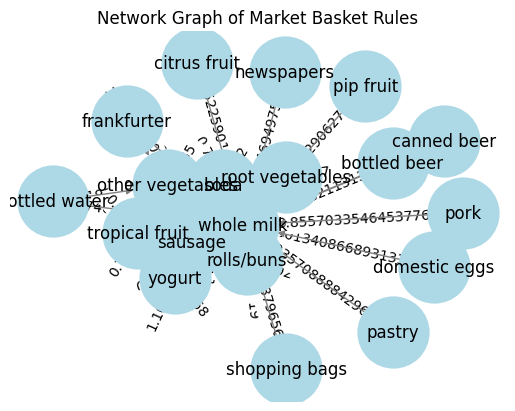

In [11]:
import networkx as nx

# Convert antecedents and consequents into strings
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges with weights based on the lift
for _, row in rules.iterrows():
    G.add_edge(row['antecedents'], row['consequents'], weight=row['lift'])

# Draw the network graph
pos = nx.spring_layout(G, seed=42)  # for consistent layout between graph drawings
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2500, edge_color='gray', linewidths=2)
plt.title('Network Graph of Market Basket Rules')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


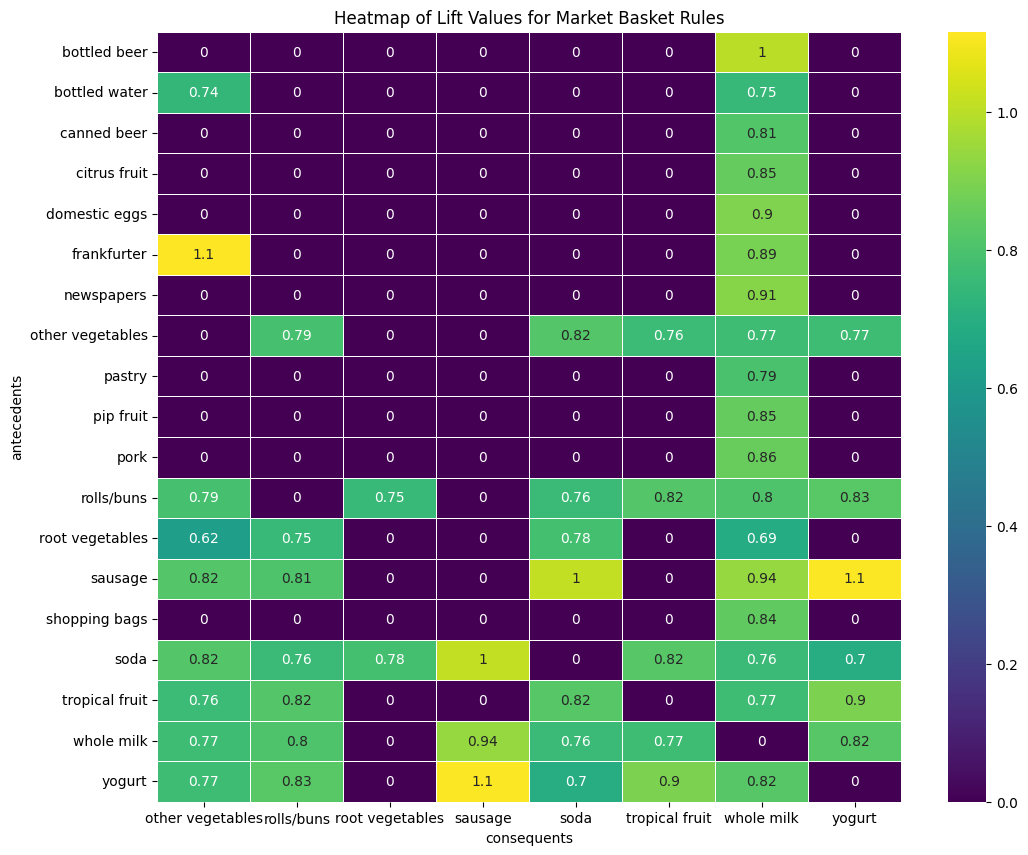

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table for the heatmap
pivot = rules.pivot(index='antecedents', columns='consequents', values='lift')  # Can also use 'support' or 'confidence'
pivot.fillna(0, inplace=True)  # Fill missing values with 0

# Generate the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot, annot=True, cmap='viridis', linewidths=.5)
plt.title('Heatmap of Lift Values for Market Basket Rules')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


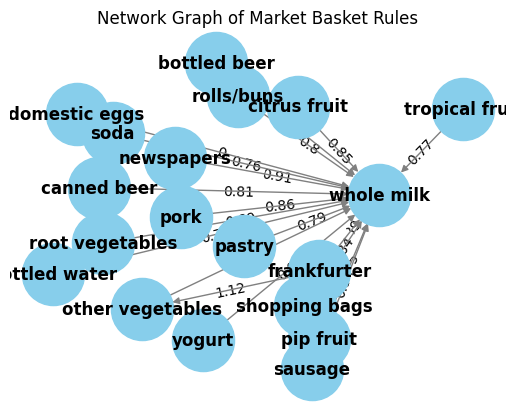

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Lower the threshold for lift or use confidence
significant_rules = rules[rules['lift'] > 1.2]  # Lowered from 1.5, adjust based on your dataset characteristics
if significant_rules.empty:
    significant_rules = rules[rules['confidence'] > 0.1]  # Alternative threshold

# Check if there are significant rules to plot
if significant_rules.empty:
    print("No significant rules found with the current thresholds. Please adjust the thresholds.")
else:
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes and edges for only significant rules
    for _, row in significant_rules.iterrows():
        G.add_edge(row['antecedents'], row['consequents'], weight=round(row['lift'], 2))

    # Draw the network graph
    pos = nx.spring_layout(G, seed=42)  # For consistent layout
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw(G, pos, node_size=2000, node_color='skyblue', with_labels=True, font_weight='bold', edge_color='gray')
    plt.title('Network Graph of Market Basket Rules')
    plt.show()


# Actionable Insights

**Strong Item Pairings:**

Sausage and Yogurt: With a lift value of 1.1 in the heatmap, this indicates a strong association. Customers who buy sausage are also likely to buy yogurt, suggesting these items are frequently purchased together.
Frankfurter and Rolls/Buns: Similarly, the lift value of 1.1 suggests a robust association, indicating that customers often purchase these items together. This could be due to common usage in meals such as hot dogs.

**Product Groupings:**

Whole Milk as a Central Hub: The network graph shows whole milk connecting with multiple items like tropical fruit, rolls/buns, and yogurt. This suggests that whole milk is a versatile product that is frequently co-purchased with a variety of other items, making it a central item in many shopping trips.
Specific Combinations for Promotions:

Soda and Domestic Eggs: These items show a lift of 0.9 when bought together. Even though this is not as high as some others, it's still above average and could be targeted for cross-promotions or bundled discounts.

# Recommendations

**Store Layout Adjustments:**

Place High-Lift Items Near Each Other: Position items like frankfurters and rolls/buns or sausage and yogurt close to each other in store aisles to encourage simultaneous purchases.
Central Placement for Whole Milk: Given its multiple connections, placing whole milk centrally or near entrance points can facilitate ease of access, increasing the likelihood of its purchase with other items.

**Marketing Strategies:**

Bundled Promotions: Offer discounts on combinations like sausage and yogurt or frankfurter and rolls/buns, which are likely to be purchased together. These can be advertised in-store or through flyers.
Targeted Email Campaigns: Use customer purchase data to send personalized emails suggesting products that complement their frequent purchases, based on the insights from the analysis.
Inventory Management:

**Stock Optimization**: Increase the stock levels of products that have high lift values and are frequently bought together to ensure availability and meet customer demand, reducing the risk of stockouts during peak times.
Customer Loyalty Programs:

Rewards for Combo Purchases **bold text**: Introduce loyalty points or rewards for customers who purchase high-lift item combinations, encouraging repeat business and customer satisfaction.